### Recopilación de datos

Explicado de forma sencilla, para que un modelado de Machine Learning funcione correctamente, debemos nutrirlo de una gran cantidad de datos. Estos servirán como punto de partida. 

Es más importante la calidad que la cantidad. No obstante, lo idóneo es plantear un equilibrio, es decir, cuantos más y mejores datos tengamos para empezar, mejor será el rendimiento del modelo.

#### Importamos las librerias necesarias para 

In [1]:
import pandas as pd

In [2]:
taxis_NYC =pd.read_parquet('../dataset limpios api/taxis_NYC_2023_2024.parquet')
temperature =pd.read_parquet('../dataset limpios api/temperature_C_2023_2024.parquet')
precipitacion =pd.read_parquet('../dataset limpios api/precipitacion_ml_2023_2024.parquet')
calidad_aire =pd.read_parquet('../dataset limpios api/calidad_aire_ugm3_2023_2024.parquet')
contaminacion_acustica =pd.read_parquet('../dataset limpios api/contaminacion_acustica_db_2023_2024.parquet')

Analizamos cada datasets para preveer por donde hacemos el merge

In [3]:
taxis_NYC

,RatecodeID,passenger_count,trip_distance,amount,service_type,pickup_borough,dropoff_borough,pickup_date,pickup_time,dropoff_date,dropoff_time
index,,,,,,,,,,,
0,1.0,1,2.48,26.46,yellow,Manhattan,Manhattan,2023-10-07,1900-01-01 13:37:11,2023-10-07,1900-01-01 13:50:23
1,1.0,6,1.91,23.94,yellow,Manhattan,Manhattan,2024-01-09,1900-01-01 23:09:59,2024-01-09,1900-01-01 23:20:37
2,1.0,1,0.62,18.20,yellow,Manhattan,Manhattan,2023-08-03,1900-01-01 19:33:27,2023-08-03,1900-01-01 19:38:12
3,1.0,1,2.62,50.40,yellow,Manhattan,Manhattan,2023-05-16,1900-01-01 09:19:55,2023-05-16,1900-01-01 09:55:07
4,1.0,2,1.40,27.80,yellow,Manhattan,Manhattan,2023-01-01,1900-01-01 20:09:53,2023-01-01,1900-01-01 20:30:46
...,...,...,...,...,...,...,...,...,...,...,...
7889155,1.0,1,0.78,15.68,green,Manhattan,Manhattan,2023-12-22,1900-01-01 19:43:19,2023-12-22,1900-01-01 19:48:02
7889156,1.0,1,2.51,32.47,green,Manhattan,Manhattan,2023-07-25,1900-01-01 17:45:09,2023-07-25,1900-01-01 17:57:38
7889157,1.0,1,14.07,71.20,green,Queens,Queens,2023-03-20,1900-01-01 15:07:35,2023-03-20,1900-01-01 15:49:05


In [4]:
temperature

,fecha,año,mes,dia,hora,temperature_C
376944,2023-01-01,2023,01,01,00:00,10.6
376945,2023-01-01,2023,01,01,01:00,10.4
376946,2023-01-01,2023,01,01,02:00,10.3
376947,2023-01-01,2023,01,01,03:00,10.2
376948,2023-01-01,2023,01,01,04:00,9.6
...,...,...,...,...,...,...
387499,2024-03-15,2024,03,15,19:00,14.3
387500,2024-03-15,2024,03,15,20:00,12.5
387501,2024-03-15,2024,03,15,21:00,10.1
387502,2024-03-15,2024,03,15,22:00,9.2


In [5]:
precipitacion

,fecha,año,mes,dia,hora,precipitation_ml
376944,2023-01-01,2023,01,01,00:00,1.0
376945,2023-01-01,2023,01,01,01:00,1.0
376946,2023-01-01,2023,01,01,02:00,0.1
376947,2023-01-01,2023,01,01,03:00,0.0
376948,2023-01-01,2023,01,01,04:00,0.0
...,...,...,...,...,...,...
387499,2024-03-15,2024,03,15,19:00,0.0
387500,2024-03-15,2024,03,15,20:00,0.0
387501,2024-03-15,2024,03,15,21:00,0.0
387502,2024-03-15,2024,03,15,22:00,0.0


In [6]:
calidad_aire

,fecha,año,mes,dia,hora,carbon_monoxide_μg/m3,nitrogen_dioxide_μg/m3,sulphur_dioxide_μg/m3,aerosol_optical_depth_550nm
3672,2023-01-01,2023,1,1,00:00,549.0,54.5,3.9,0.06
3673,2023-01-01,2023,1,1,01:00,461.0,52.4,3.2,0.06
3674,2023-01-01,2023,1,1,02:00,356.0,46.9,2.5,0.06
3675,2023-01-01,2023,1,1,03:00,301.0,38.0,2.2,0.05
3676,2023-01-01,2023,1,1,04:00,256.0,26.5,2.0,0.05
...,...,...,...,...,...,...,...,...,...
14227,2024-03-15,2024,3,15,19:00,256.0,28.6,3.6,0.11
14228,2024-03-15,2024,3,15,20:00,272.0,33.6,3.9,0.19
14229,2024-03-15,2024,3,15,21:00,262.0,29.7,3.8,0.19
14230,2024-03-15,2024,3,15,22:00,248.0,24.7,3.6,0.18


In [7]:
contaminacion_acustica

,borough,latitude,longitude,year,week,day,hour,1_engine_presence
1,1,40.72951,-73.99388,2023,43,4,8,1
2,1,40.72951,-73.99388,2023,43,4,8,1
4,1,40.72951,-73.99388,2023,43,4,8,1
5,1,40.72951,-73.99388,2023,43,4,8,1
6,1,40.72951,-73.99388,2023,43,4,8,1
...,...,...,...,...,...,...,...,...
61941,1,40.73365,-73.98879,2023,7,4,20,1
61958,1,40.73365,-73.98879,2023,3,4,16,1
61989,1,40.73365,-73.98879,2023,6,6,8,1
61990,1,40.73365,-73.98879,2023,6,6,8,1


La primera Union será entre las tablas de datos ambientales: Precipitacion, Contaminacion de aire, y Tempratura.

El proyecto está direccionado al estudio económico de los taxis, además de la sustentabibilidad y la prevencion de las emiciones de carbono.<br>
No se ha podido recopilar datos de CO2 acorde a los tiempos del dataset principal de taxis, pero se entiende por Fisica, que los parametros añadidos van ligados a este fenomeno.

* **La contaminacion de aire**, es la emisión de gases por quema de combustible, que en gran parte es emitido por los carros de la ciudad. Estos gases afectan la salud respiratoria de la<br> población además que en estructura física, son particulas de alta capacidad calorífica al igual que el CO2, por ende capturan el calor de la ciudad simulando "un invernadero".<br> Los gases emitidos son:
    * carbon_monoxide_μg/m3
    * nitrogen_dioxide_μg/m3	
    * sulphur_dioxide_μg/m3	
    * aerosol_optical_depth_550nm 

* **La tempratura**, el aumento anual de este parametro físico, es debido a las emisiones de los gases anteriomente descritos y adicionalmente del CO2:
  
* **La precipitacion**, el aumento anual de la precipitacion tambien es debido al efecto en cadena de las emisiones de contaminantes por combustible, ya que debido<br> al aumento de las tempraturas se desencadenan con más frecuencia y poder los fenomenos naturales, en nuestro caso de estudio tenemos la precipitacion.<br>
La precipitacion es directamente ligado a al aumento de la temperatura, ya que a más tempratura, más agua pasara al estado gaseoso hacia la atmosfera.

Todos estos parametros fisicos son proporcionados por centros de inventigacion cientifica de EEUU. Adicionalmente a esto debemos notar que los fenomenos naturales afectan<br> nuestros comportamientos y deciciones diariamente, por lo tanto e indirectamente son parametros fisicos que afectan la dinamica social. En nuestro caso de estudio puede<br> afectar a la demanda de servicios de Taxis, por ende ya hemos sustentado la necesidad de unir este tipo de datos a nuestro modelado.


In [8]:
#convertimos a enteros el tipo de variables de las columnas
temperature['año'] = temperature['año'].astype(int)
temperature['mes'] = temperature['mes'].astype(int)
temperature['dia'] = temperature['dia'].astype(int)

precipitacion['año'] = precipitacion['año'].astype(int)
precipitacion['mes'] = precipitacion['mes'].astype(int)
precipitacion['dia'] = precipitacion['dia'].astype(int)

calidad_aire['año'] = calidad_aire['año'].astype(int)
calidad_aire['mes'] = calidad_aire['mes'].astype(int)
calidad_aire['dia'] = calidad_aire['dia'].astype(int)

In [9]:
# Fusiona temperature y precipitacion en función de las columnas comunes
merged_TP_df = pd.merge(temperature, precipitacion, on=['fecha','año','mes','dia','hora'])

# Fusiona merged_df con calidad_aire en función de las columnas comunes
merged_ambiental_df = pd.merge(merged_TP_df, calidad_aire, on=['fecha','año','mes','dia','hora'])
# Imprime el DataFrame fusionado
merged_ambiental_df


,fecha,año,mes,dia,hora,temperature_C,precipitation_ml,carbon_monoxide_μg/m3,nitrogen_dioxide_μg/m3,sulphur_dioxide_μg/m3,aerosol_optical_depth_550nm
0,2023-01-01,2023,1,1,00:00,10.6,1.0,549.0,54.5,3.9,0.06
1,2023-01-01,2023,1,1,01:00,10.4,1.0,461.0,52.4,3.2,0.06
2,2023-01-01,2023,1,1,02:00,10.3,0.1,356.0,46.9,2.5,0.06
3,2023-01-01,2023,1,1,03:00,10.2,0.0,301.0,38.0,2.2,0.05
4,2023-01-01,2023,1,1,04:00,9.6,0.0,256.0,26.5,2.0,0.05
...,...,...,...,...,...,...,...,...,...,...,...
10555,2024-03-15,2024,3,15,19:00,14.3,0.0,256.0,28.6,3.6,0.11
10556,2024-03-15,2024,3,15,20:00,12.5,0.0,272.0,33.6,3.9,0.19
10557,2024-03-15,2024,3,15,21:00,10.1,0.0,262.0,29.7,3.8,0.19
10558,2024-03-15,2024,3,15,22:00,9.2,0.0,248.0,24.7,3.6,0.18


La segunda union será entre las tablas de datos ambientales y los datos de taxi : Taxi, Tempratura, Precipitacion y Contaminacion de aire.

In [10]:
taxis_NYC

,RatecodeID,passenger_count,trip_distance,amount,service_type,pickup_borough,dropoff_borough,pickup_date,pickup_time,dropoff_date,dropoff_time
index,,,,,,,,,,,
0,1.0,1,2.48,26.46,yellow,Manhattan,Manhattan,2023-10-07,1900-01-01 13:37:11,2023-10-07,1900-01-01 13:50:23
1,1.0,6,1.91,23.94,yellow,Manhattan,Manhattan,2024-01-09,1900-01-01 23:09:59,2024-01-09,1900-01-01 23:20:37
2,1.0,1,0.62,18.20,yellow,Manhattan,Manhattan,2023-08-03,1900-01-01 19:33:27,2023-08-03,1900-01-01 19:38:12
3,1.0,1,2.62,50.40,yellow,Manhattan,Manhattan,2023-05-16,1900-01-01 09:19:55,2023-05-16,1900-01-01 09:55:07
4,1.0,2,1.40,27.80,yellow,Manhattan,Manhattan,2023-01-01,1900-01-01 20:09:53,2023-01-01,1900-01-01 20:30:46
...,...,...,...,...,...,...,...,...,...,...,...
7889155,1.0,1,0.78,15.68,green,Manhattan,Manhattan,2023-12-22,1900-01-01 19:43:19,2023-12-22,1900-01-01 19:48:02
7889156,1.0,1,2.51,32.47,green,Manhattan,Manhattan,2023-07-25,1900-01-01 17:45:09,2023-07-25,1900-01-01 17:57:38
7889157,1.0,1,14.07,71.20,green,Queens,Queens,2023-03-20,1900-01-01 15:07:35,2023-03-20,1900-01-01 15:49:05


In [11]:
# Convertir la columna 'pickup_date' a tipo datetime y extraer año, mes y día
taxis_NYC['pickup_date'] = pd.to_datetime(taxis_NYC['pickup_date'])
taxis_NYC['año'] = taxis_NYC['pickup_date'].dt.year
taxis_NYC['mes'] = taxis_NYC['pickup_date'].dt.month
taxis_NYC['dia'] = taxis_NYC['pickup_date'].dt.day
taxis_NYC['fecha'] = taxis_NYC['pickup_date']


# Convertir la columna 'pickup_time' a tipo datetime y extraer solo la hora
taxis_NYC['hora'] = pd.to_datetime(taxis_NYC['pickup_time']).dt.strftime('%H')
taxis_NYC['hora_salida'] = pd.to_datetime(taxis_NYC['pickup_time']).dt.strftime('%H:%M:%S')
taxis_NYC['hora_llegada'] = pd.to_datetime(taxis_NYC['dropoff_time']).dt.strftime('%H:%M:%S')


taxis_NYC

,RatecodeID,passenger_count,trip_distance,amount,service_type,pickup_borough,dropoff_borough,pickup_date,pickup_time,dropoff_date,dropoff_time,año,mes,dia,fecha,hora,hora_salida,hora_llegada
index,,,,,,,,,,,,,,,,,,
0,1.0,1,2.48,26.46,yellow,Manhattan,Manhattan,2023-10-07,1900-01-01 13:37:11,2023-10-07,1900-01-01 13:50:23,2023,10,7,2023-10-07,13,13:37:11,13:50:23
1,1.0,6,1.91,23.94,yellow,Manhattan,Manhattan,2024-01-09,1900-01-01 23:09:59,2024-01-09,1900-01-01 23:20:37,2024,1,9,2024-01-09,23,23:09:59,23:20:37
2,1.0,1,0.62,18.20,yellow,Manhattan,Manhattan,2023-08-03,1900-01-01 19:33:27,2023-08-03,1900-01-01 19:38:12,2023,8,3,2023-08-03,19,19:33:27,19:38:12
3,1.0,1,2.62,50.40,yellow,Manhattan,Manhattan,2023-05-16,1900-01-01 09:19:55,2023-05-16,1900-01-01 09:55:07,2023,5,16,2023-05-16,09,09:19:55,09:55:07
4,1.0,2,1.40,27.80,yellow,Manhattan,Manhattan,2023-01-01,1900-01-01 20:09:53,2023-01-01,1900-01-01 20:30:46,2023,1,1,2023-01-01,20,20:09:53,20:30:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889155,1.0,1,0.78,15.68,green,Manhattan,Manhattan,2023-12-22,1900-01-01 19:43:19,2023-12-22,1900-01-01 19:48:02,2023,12,22,2023-12-22,19,19:43:19,19:48:02
7889156,1.0,1,2.51,32.47,green,Manhattan,Manhattan,2023-07-25,1900-01-01 17:45:09,2023-07-25,1900-01-01 17:57:38,2023,7,25,2023-07-25,17,17:45:09,17:57:38
7889157,1.0,1,14.07,71.20,green,Queens,Queens,2023-03-20,1900-01-01 15:07:35,2023-03-20,1900-01-01 15:49:05,2023,3,20,2023-03-20,15,15:07:35,15:49:05


In [12]:
#añadiendo ceros a la hora
taxis_NYC['hora'] = taxis_NYC['hora'].str.zfill(2) + ':00'
taxis_NYC

,RatecodeID,passenger_count,trip_distance,amount,service_type,pickup_borough,dropoff_borough,pickup_date,pickup_time,dropoff_date,dropoff_time,año,mes,dia,fecha,hora,hora_salida,hora_llegada
index,,,,,,,,,,,,,,,,,,
0,1.0,1,2.48,26.46,yellow,Manhattan,Manhattan,2023-10-07,1900-01-01 13:37:11,2023-10-07,1900-01-01 13:50:23,2023,10,7,2023-10-07,13:00,13:37:11,13:50:23
1,1.0,6,1.91,23.94,yellow,Manhattan,Manhattan,2024-01-09,1900-01-01 23:09:59,2024-01-09,1900-01-01 23:20:37,2024,1,9,2024-01-09,23:00,23:09:59,23:20:37
2,1.0,1,0.62,18.20,yellow,Manhattan,Manhattan,2023-08-03,1900-01-01 19:33:27,2023-08-03,1900-01-01 19:38:12,2023,8,3,2023-08-03,19:00,19:33:27,19:38:12
3,1.0,1,2.62,50.40,yellow,Manhattan,Manhattan,2023-05-16,1900-01-01 09:19:55,2023-05-16,1900-01-01 09:55:07,2023,5,16,2023-05-16,09:00,09:19:55,09:55:07
4,1.0,2,1.40,27.80,yellow,Manhattan,Manhattan,2023-01-01,1900-01-01 20:09:53,2023-01-01,1900-01-01 20:30:46,2023,1,1,2023-01-01,20:00,20:09:53,20:30:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889155,1.0,1,0.78,15.68,green,Manhattan,Manhattan,2023-12-22,1900-01-01 19:43:19,2023-12-22,1900-01-01 19:48:02,2023,12,22,2023-12-22,19:00,19:43:19,19:48:02
7889156,1.0,1,2.51,32.47,green,Manhattan,Manhattan,2023-07-25,1900-01-01 17:45:09,2023-07-25,1900-01-01 17:57:38,2023,7,25,2023-07-25,17:00,17:45:09,17:57:38
7889157,1.0,1,14.07,71.20,green,Queens,Queens,2023-03-20,1900-01-01 15:07:35,2023-03-20,1900-01-01 15:49:05,2023,3,20,2023-03-20,15:00,15:07:35,15:49:05


In [13]:
#segundo merge
merged_dfTandCleft = pd.merge(taxis_NYC, merged_ambiental_df, on=['fecha','año','mes','dia','hora'], how='left')
merged_dfTandCleft


,RatecodeID,passenger_count,trip_distance,amount,service_type,pickup_borough,dropoff_borough,pickup_date,pickup_time,dropoff_date,...,fecha,hora,hora_salida,hora_llegada,temperature_C,precipitation_ml,carbon_monoxide_μg/m3,nitrogen_dioxide_μg/m3,sulphur_dioxide_μg/m3,aerosol_optical_depth_550nm
0,1.0,1,2.48,26.46,yellow,Manhattan,Manhattan,2023-10-07,1900-01-01 13:37:11,2023-10-07,...,2023-10-07,13:00,13:37:11,13:50:23,20.4,0.2,207.0,18.1,5.7,0.17
1,1.0,6,1.91,23.94,yellow,Manhattan,Manhattan,2024-01-09,1900-01-01 23:09:59,2024-01-09,...,2024-01-09,23:00,23:09:59,23:20:37,12.4,6.8,151.0,10.9,1.5,0.16
2,1.0,1,0.62,18.20,yellow,Manhattan,Manhattan,2023-08-03,1900-01-01 19:33:27,2023-08-03,...,2023-08-03,19:00,19:33:27,19:38:12,23.2,0.0,254.0,16.3,5.0,0.70
3,1.0,1,2.62,50.40,yellow,Manhattan,Manhattan,2023-05-16,1900-01-01 09:19:55,2023-05-16,...,2023-05-16,09:00,09:19:55,09:55:07,18.0,0.0,208.0,21.8,3.2,0.09
4,1.0,2,1.40,27.80,yellow,Manhattan,Manhattan,2023-01-01,1900-01-01 20:09:53,2023-01-01,...,2023-01-01,20:00,20:09:53,20:30:46,4.7,0.0,1424.0,48.0,8.4,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775078,1.0,1,0.78,15.68,green,Manhattan,Manhattan,2023-12-22,1900-01-01 19:43:19,2023-12-22,...,2023-12-22,19:00,19:43:19,19:48:02,-1.9,0.0,623.0,70.5,21.8,0.11
7775079,1.0,1,2.51,32.47,green,Manhattan,Manhattan,2023-07-25,1900-01-01 17:45:09,2023-07-25,...,2023-07-25,17:00,17:45:09,17:57:38,23.7,0.6,290.0,17.1,6.3,0.68
7775080,1.0,1,14.07,71.20,green,Queens,Queens,2023-03-20,1900-01-01 15:07:35,2023-03-20,...,2023-03-20,15:00,15:07:35,15:49:05,9.5,0.0,198.0,15.9,5.0,0.13
7775081,1.0,1,6.92,63.14,green,Brooklyn,Queens,2023-11-09,1900-01-01 10:16:36,2023-11-09,...,2023-11-09,10:00,10:16:36,11:01:56,11.7,0.0,281.0,32.8,6.6,0.21


La tercera union será entre las tablas de datos ambientales, datos de taxi y ruido de motores : Taxi, Tempratura, Precipitacion, Contaminacion de aire y contaminacion acustica.

In [14]:
contaminacion_acustica

,borough,latitude,longitude,year,week,day,hour,1_engine_presence
1,1,40.72951,-73.99388,2023,43,4,8,1
2,1,40.72951,-73.99388,2023,43,4,8,1
4,1,40.72951,-73.99388,2023,43,4,8,1
5,1,40.72951,-73.99388,2023,43,4,8,1
6,1,40.72951,-73.99388,2023,43,4,8,1
...,...,...,...,...,...,...,...,...
61941,1,40.73365,-73.98879,2023,7,4,20,1
61958,1,40.73365,-73.98879,2023,3,4,16,1
61989,1,40.73365,-73.98879,2023,6,6,8,1
61990,1,40.73365,-73.98879,2023,6,6,8,1


In [15]:
contaminacion_acustica.borough.value_counts()
#1=Manhattan, 3=Brooklyn, 4=Queens

borough
1    2761
3     338
4      59
Name: count, dtype: int64

In [16]:
#1=Manhattan, 3=Brooklyn, 4=Queens

# Definir un diccionario que mapee los números a los nombres de los boroughs
mapeo_boroughs = {1: 'Manhattan', 3: 'Brooklyn', 4: 'Queens'}

# Usar el método replace para cambiar los números a nombres
contaminacion_acustica['borough'] = contaminacion_acustica['borough'].replace(mapeo_boroughs)

# Imprimir el DataFrame resultante
contaminacion_acustica


,borough,latitude,longitude,year,week,day,hour,1_engine_presence
1,Manhattan,40.72951,-73.99388,2023,43,4,8,1
2,Manhattan,40.72951,-73.99388,2023,43,4,8,1
4,Manhattan,40.72951,-73.99388,2023,43,4,8,1
5,Manhattan,40.72951,-73.99388,2023,43,4,8,1
6,Manhattan,40.72951,-73.99388,2023,43,4,8,1
...,...,...,...,...,...,...,...,...
61941,Manhattan,40.73365,-73.98879,2023,7,4,20,1
61958,Manhattan,40.73365,-73.98879,2023,3,4,16,1
61989,Manhattan,40.73365,-73.98879,2023,6,6,8,1
61990,Manhattan,40.73365,-73.98879,2023,6,6,8,1


In [17]:
# Convertir el número de semana a una fecha y luego extraer el mes
contaminacion_acustica['fecha'] = pd.to_datetime(contaminacion_acustica['year'].astype(str) + contaminacion_acustica['week'].astype(str) + '1', format='%Y%W%w')
contaminacion_acustica['mes'] = contaminacion_acustica['fecha'].dt.month

# Imprimir el DataFrame resultante
contaminacion_acustica


,borough,latitude,longitude,year,week,day,hour,1_engine_presence,fecha,mes
1,Manhattan,40.72951,-73.99388,2023,43,4,8,1,2023-10-23,10
2,Manhattan,40.72951,-73.99388,2023,43,4,8,1,2023-10-23,10
4,Manhattan,40.72951,-73.99388,2023,43,4,8,1,2023-10-23,10
5,Manhattan,40.72951,-73.99388,2023,43,4,8,1,2023-10-23,10
6,Manhattan,40.72951,-73.99388,2023,43,4,8,1,2023-10-23,10
...,...,...,...,...,...,...,...,...,...,...
61941,Manhattan,40.73365,-73.98879,2023,7,4,20,1,2023-02-13,2
61958,Manhattan,40.73365,-73.98879,2023,3,4,16,1,2023-01-16,1
61989,Manhattan,40.73365,-73.98879,2023,6,6,8,1,2023-02-06,2
61990,Manhattan,40.73365,-73.98879,2023,6,6,8,1,2023-02-06,2


In [18]:
# Convertir la columna 'hour' a tipo string y luego aplicar zfill
contaminacion_acustica['hour'] = contaminacion_acustica['hour'].astype(str).str.zfill(2) + ':00'

# Imprimir el DataFrame resultante
contaminacion_acustica


,borough,latitude,longitude,year,week,day,hour,1_engine_presence,fecha,mes
1,Manhattan,40.72951,-73.99388,2023,43,4,08:00,1,2023-10-23,10
2,Manhattan,40.72951,-73.99388,2023,43,4,08:00,1,2023-10-23,10
4,Manhattan,40.72951,-73.99388,2023,43,4,08:00,1,2023-10-23,10
5,Manhattan,40.72951,-73.99388,2023,43,4,08:00,1,2023-10-23,10
6,Manhattan,40.72951,-73.99388,2023,43,4,08:00,1,2023-10-23,10
...,...,...,...,...,...,...,...,...,...,...
61941,Manhattan,40.73365,-73.98879,2023,7,4,20:00,1,2023-02-13,2
61958,Manhattan,40.73365,-73.98879,2023,3,4,16:00,1,2023-01-16,1
61989,Manhattan,40.73365,-73.98879,2023,6,6,08:00,1,2023-02-06,2
61990,Manhattan,40.73365,-73.98879,2023,6,6,08:00,1,2023-02-06,2


In [19]:
DataSetML = pd.merge(merged_dfTandCleft, contaminacion_acustica, left_on=['pickup_borough','año','mes','dia','hora'], right_on=['borough','year','mes','day','hour'], how='left')
DataSetML


,RatecodeID,passenger_count,trip_distance,amount,service_type,pickup_borough,dropoff_borough,pickup_date,pickup_time,dropoff_date,...,aerosol_optical_depth_550nm,borough,latitude,longitude,year,week,day,hour,1_engine_presence,fecha_y
0,1.0,1,2.48,26.46,yellow,Manhattan,Manhattan,2023-10-07,1900-01-01 13:37:11,2023-10-07,...,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1.0,6,1.91,23.94,yellow,Manhattan,Manhattan,2024-01-09,1900-01-01 23:09:59,2024-01-09,...,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1.0,1,0.62,18.20,yellow,Manhattan,Manhattan,2023-08-03,1900-01-01 19:33:27,2023-08-03,...,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1.0,1,2.62,50.40,yellow,Manhattan,Manhattan,2023-05-16,1900-01-01 09:19:55,2023-05-16,...,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1.0,2,1.40,27.80,yellow,Manhattan,Manhattan,2023-01-01,1900-01-01 20:09:53,2023-01-01,...,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8946600,1.0,1,0.78,15.68,green,Manhattan,Manhattan,2023-12-22,1900-01-01 19:43:19,2023-12-22,...,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
8946601,1.0,1,2.51,32.47,green,Manhattan,Manhattan,2023-07-25,1900-01-01 17:45:09,2023-07-25,...,0.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
8946602,1.0,1,14.07,71.20,green,Queens,Queens,2023-03-20,1900-01-01 15:07:35,2023-03-20,...,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
8946603,1.0,1,6.92,63.14,green,Brooklyn,Queens,2023-11-09,1900-01-01 10:16:36,2023-11-09,...,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


### Tratamiento de los datos ETL

In [20]:
DataSetML.drop(['fecha_x','borough','latitude', 'longitude', 'year', 'week', 'day', 'hour','fecha_y','dropoff_borough','pickup_date','pickup_time','dropoff_date','dropoff_time'], axis=1, inplace=True)

In [21]:
DataSetML = DataSetML.drop_duplicates()


In [22]:
DataSetML['1_engine_presence'] = DataSetML['1_engine_presence'].fillna(0)


C:\Users\Pc\AppData\Local\Temp\ipykernel_3968\1378174508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSetML['1_engine_presence'] = DataSetML['1_engine_presence'].fillna(0)


In [23]:
DataSetML[['temperature_C','precipitation_ml','carbon_monoxide_μg/m3','nitrogen_dioxide_μg/m3','sulphur_dioxide_μg/m3','aerosol_optical_depth_550nm']] = DataSetML[['temperature_C','precipitation_ml','carbon_monoxide_μg/m3','nitrogen_dioxide_μg/m3','sulphur_dioxide_μg/m3','aerosol_optical_depth_550nm']].fillna(0)


C:\Users\Pc\AppData\Local\Temp\ipykernel_3968\746710540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSetML[['temperature_C','precipitation_ml','carbon_monoxide_μg/m3','nitrogen_dioxide_μg/m3','sulphur_dioxide_μg/m3','aerosol_optical_depth_550nm']] = DataSetML[['temperature_C','precipitation_ml','carbon_monoxide_μg/m3','nitrogen_dioxide_μg/m3','sulphur_dioxide_μg/m3','aerosol_optical_depth_550nm']].fillna(0)


In [24]:
num_nulos_por_columna = DataSetML.isnull().sum()
num_nulos_por_columna

RatecodeID                     0
passenger_count                0
trip_distance                  0
amount                         0
service_type                   0
pickup_borough                 0
año                            0
mes                            0
dia                            0
hora                           0
hora_salida                    0
hora_llegada                   0
temperature_C                  0
precipitation_ml               0
carbon_monoxide_μg/m3          0
nitrogen_dioxide_μg/m3         0
sulphur_dioxide_μg/m3          0
aerosol_optical_depth_550nm    0
1_engine_presence              0
dtype: int64

In [25]:
DataSetML = DataSetML[DataSetML['trip_distance'] <= 100]
DataSetML = DataSetML[DataSetML['amount'] >= 5]
DataSetML = DataSetML[DataSetML['pickup_borough'] != 'EWR']
DataSetML = DataSetML[DataSetML['carbon_monoxide_μg/m3'] <= 2000]
DataSetML = DataSetML[DataSetML['nitrogen_dioxide_μg/m3'] > 0]
DataSetML = DataSetML[DataSetML['aerosol_optical_depth_550nm'] > 0]
DataSetML.reset_index(inplace=True)
DataSetML = DataSetML.drop(columns='index')

In [26]:
DataSetML.to_parquet('../modeloML/DataSetML.parquet')

Realizacion de Eda para analizar los las caratceristicas de nuestro nuevo dataframes

In [1]:
import pandas as pd

### Guardamos nuestra base de datos

In [2]:
DataSetML = pd.read_parquet('../modeloML/DataSetML.parquet')
DataSetML

,RatecodeID,passenger_count,trip_distance,amount,service_type,pickup_borough,año,mes,dia,hora,hora_salida,hora_llegada,temperature_C,precipitation_ml,carbon_monoxide_μg/m3,nitrogen_dioxide_μg/m3,sulphur_dioxide_μg/m3,aerosol_optical_depth_550nm,1_engine_presence
0,1.0,1,2.48,26.46,yellow,Manhattan,2023,10,7,13:00,13:37:11,13:50:23,20.4,0.2,207.0,18.1,5.7,0.17,0.0
1,1.0,6,1.91,23.94,yellow,Manhattan,2024,1,9,23:00,23:09:59,23:20:37,12.4,6.8,151.0,10.9,1.5,0.16,0.0
2,1.0,1,0.62,18.20,yellow,Manhattan,2023,8,3,19:00,19:33:27,19:38:12,23.2,0.0,254.0,16.3,5.0,0.70,0.0
3,1.0,1,2.62,50.40,yellow,Manhattan,2023,5,16,09:00,09:19:55,09:55:07,18.0,0.0,208.0,21.8,3.2,0.09,0.0
4,1.0,2,1.40,27.80,yellow,Manhattan,2023,1,1,20:00,20:09:53,20:30:46,4.7,0.0,1424.0,48.0,8.4,0.07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7698440,1.0,1,0.78,15.68,green,Manhattan,2023,12,22,19:00,19:43:19,19:48:02,-1.9,0.0,623.0,70.5,21.8,0.11,0.0
7698441,1.0,1,2.51,32.47,green,Manhattan,2023,7,25,17:00,17:45:09,17:57:38,23.7,0.6,290.0,17.1,6.3,0.68,0.0
7698442,1.0,1,14.07,71.20,green,Queens,2023,3,20,15:00,15:07:35,15:49:05,9.5,0.0,198.0,15.9,5.0,0.13,0.0
7698443,1.0,1,6.92,63.14,green,Brooklyn,2023,11,9,10:00,10:16:36,11:01:56,11.7,0.0,281.0,32.8,6.6,0.21,0.0


### Realizamos un EDA para entender un poco mejor nuestros Datasets

In [3]:
import matplotlib.pyplot as plt

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000., 8000000., 9000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

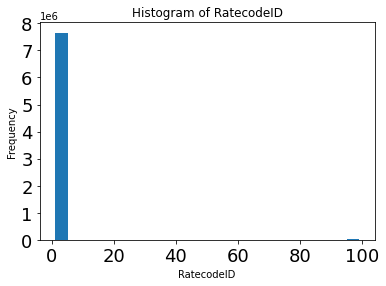

In [4]:
plt.figure() # Create a new figure for each column
plt.hist(DataSetML['RatecodeID'], bins='auto') # Plot a histogram of the column
plt.title(f'Histogram of RatecodeID') # Set the title of the plot
plt.xlabel('RatecodeID') # Set the x-axis label
plt.ylabel('Frequency') # Set the y-axis label
plt.xticks(fontsize=18) # Set the font size of the x-tick labels
plt.yticks(fontsize=18) # Set the font size of the y-tick labels


(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

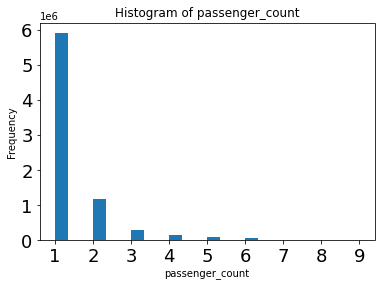

In [5]:
plt.figure() # Create a new figure for each column
plt.hist(DataSetML['passenger_count'], bins='auto') # Plot a histogram of the column
plt.title(f'Histogram of passenger_count') # Set the title of the plot
plt.xlabel('passenger_count') # Set the x-axis label
plt.ylabel('Frequency') # Set the y-axis label
plt.xticks(fontsize=18) # Set the font size of the x-tick labels
plt.yticks(fontsize=18) # Set the font size of the y-tick labels


(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000., 8000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

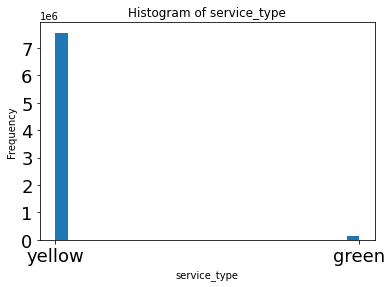

In [6]:
plt.figure() # Create a new figure for each column
plt.hist(DataSetML['service_type'], bins='auto') # Plot a histogram of the column
plt.title(f'Histogram of service_type') # Set the title of the plot
plt.xlabel('service_type') # Set the x-axis label
plt.ylabel('Frequency') # Set the y-axis label
plt.xticks(fontsize=18) # Set the font size of the x-tick labels
plt.yticks(fontsize=18) # Set the font size of the y-tick labels


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

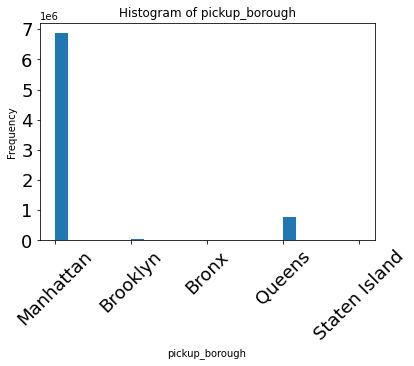

In [7]:
plt.figure() # Create a new figure for each column
plt.hist(DataSetML['pickup_borough'], bins='auto') # Plot a histogram of the column
plt.title(f'Histogram of pickup_borough') # Set the title of the plot
plt.xlabel('pickup_borough') # Set the x-axis label
plt.ylabel('Frequency') # Set the y-axis label
plt.xticks(fontsize=18) # Set the font size of the x-tick labels
plt.yticks(fontsize=18) # Set the font size of the y-tick labels
plt.xticks(rotation=45)

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000., 8000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

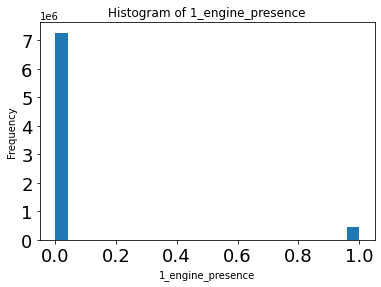

In [8]:
plt.figure() # Create a new figure for each column
plt.hist(DataSetML['1_engine_presence'], bins='auto') # Plot a histogram of the column
plt.title(f'Histogram of 1_engine_presence') # Set the title of the plot
plt.xlabel('1_engine_presence') # Set the x-axis label
plt.ylabel('Frequency') # Set the y-axis label
plt.xticks(fontsize=18) # Set the font size of the x-tick labels
plt.yticks(fontsize=18) # Set the font size of the y-tick labels


In [9]:
import seaborn as sns

c:\Users\Pc\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Matriz de de Correlacion

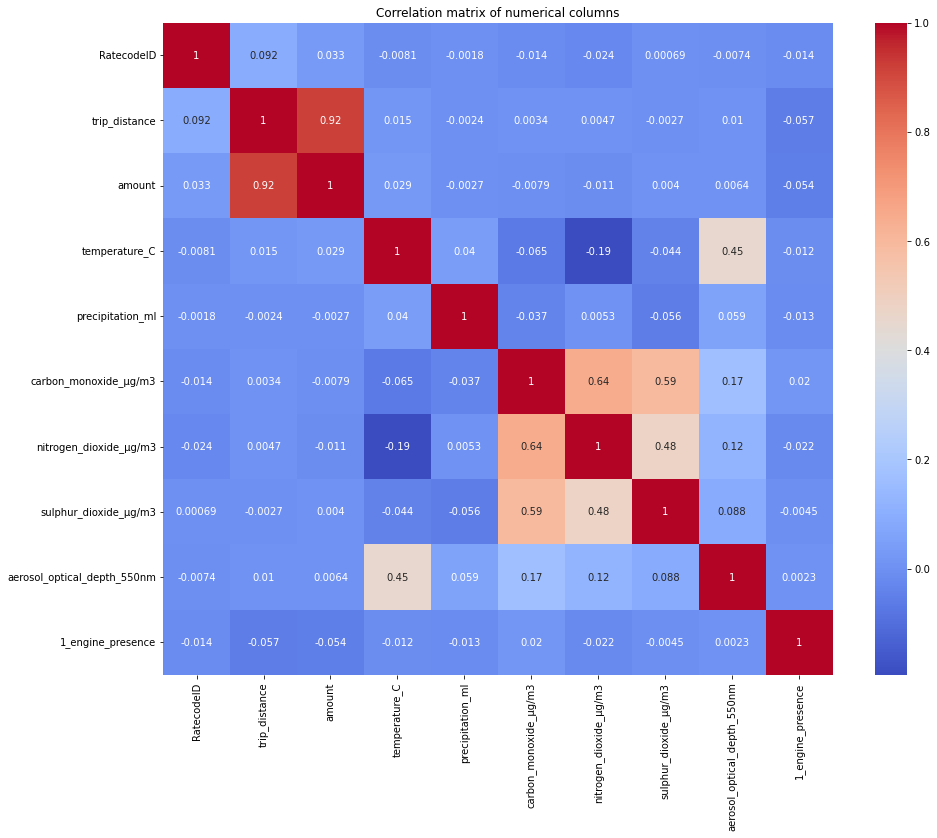

In [10]:
numeric_columns = DataSetML.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = DataSetML[numeric_columns].corr()
plt.figure(figsize=(15,12)) # Increase the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of numerical columns')
plt.show()

## Modelamiento de Machine Learning

### Se cambiaran ciertos parametros adecuando a nuestro modelo de prediccion de demanda

In [1]:
import pandas as pd

In [2]:
DataSetML = pd.read_parquet('../modeloML/DataSetML.parquet')
DataSetML['service_type2'] = DataSetML['service_type'].map({'yellow': 1, 'green': 0})
DataSetML['pickup_borough2'] = DataSetML['pickup_borough'].map({'Manhattan': 1, 'Queens': 2, 'Brooklyn': 3, 'Bronx': 4, 'Staten Island': 5})
DataSetML

,RatecodeID,passenger_count,trip_distance,amount,service_type,pickup_borough,año,mes,dia,hora,...,hora_llegada,temperature_C,precipitation_ml,carbon_monoxide_μg/m3,nitrogen_dioxide_μg/m3,sulphur_dioxide_μg/m3,aerosol_optical_depth_550nm,1_engine_presence,service_type2,pickup_borough2
0,1.0,1,2.48,26.46,yellow,Manhattan,2023,10,7,13:00,...,13:50:23,20.4,0.2,207.0,18.1,5.7,0.17,0.0,1,1
1,1.0,6,1.91,23.94,yellow,Manhattan,2024,1,9,23:00,...,23:20:37,12.4,6.8,151.0,10.9,1.5,0.16,0.0,1,1
2,1.0,1,0.62,18.20,yellow,Manhattan,2023,8,3,19:00,...,19:38:12,23.2,0.0,254.0,16.3,5.0,0.70,0.0,1,1
3,1.0,1,2.62,50.40,yellow,Manhattan,2023,5,16,09:00,...,09:55:07,18.0,0.0,208.0,21.8,3.2,0.09,0.0,1,1
4,1.0,2,1.40,27.80,yellow,Manhattan,2023,1,1,20:00,...,20:30:46,4.7,0.0,1424.0,48.0,8.4,0.07,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7698440,1.0,1,0.78,15.68,green,Manhattan,2023,12,22,19:00,...,19:48:02,-1.9,0.0,623.0,70.5,21.8,0.11,0.0,0,1
7698441,1.0,1,2.51,32.47,green,Manhattan,2023,7,25,17:00,...,17:57:38,23.7,0.6,290.0,17.1,6.3,0.68,0.0,0,1
7698442,1.0,1,14.07,71.20,green,Queens,2023,3,20,15:00,...,15:49:05,9.5,0.0,198.0,15.9,5.0,0.13,0.0,0,2
7698443,1.0,1,6.92,63.14,green,Brooklyn,2023,11,9,10:00,...,11:01:56,11.7,0.0,281.0,32.8,6.6,0.21,0.0,0,3


In [6]:
DataSetML[['trip_distance','año', 'mes', 'dia', 'hora_salida', 'temperature_C', 'service_type2']]

,trip_distance,año,mes,dia,hora_salida,temperature_C,service_type2
0,2.48,2023,10,7,13,20.4,1
1,1.91,2024,1,9,23,12.4,1
2,0.62,2023,8,3,19,23.2,1
3,2.62,2023,5,16,9,18.0,1
4,1.40,2023,1,1,20,4.7,1
...,...,...,...,...,...,...,...
7698440,0.78,2023,12,22,19,-1.9,0
7698441,2.51,2023,7,25,17,23.7,0
7698442,14.07,2023,3,20,15,9.5,0
7698443,6.92,2023,11,9,10,11.7,0


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Paso 1: Preparación de datos
# Suponiendo que tu dataframe se llama df
#df = pd.read_csv('tu_archivo.csv')
DataSetML['hora_salida'] = pd.to_datetime(DataSetML['hora_salida'], format='%H:%M:%S').dt.hour

# Conversión de variables categóricas a variables dummy
#df = pd.get_dummies(DataSetML, columns=['pickup_borough'])
df = DataSetML
# Separación de características y variable objetivo
X = df.drop(['amount','service_type','RatecodeID','hora_llegada','hora', 'passenger_count','pickup_borough','precipitation_ml','nitrogen_dioxide_μg/m3','sulphur_dioxide_μg/m3',
              'aerosol_optical_depth_550nm','1_engine_presence','carbon_monoxide_μg/m3', 'pickup_borough2','año', 'mes', 'dia', 'hora_salida', 'temperature_C', 'service_type2'], axis=1)
y = df['amount']

# Separación de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Entrenamiento de modelos
# Modelo para taxi amarillo
X_yellow = X[df['service_type2'] == 1]
y_yellow = y[df['service_type2'] == 1]

model_yellow = RandomForestRegressor()
model_yellow.fit(X_yellow, y_yellow)

# Modelo para taxi verde
X_green = X[df['service_type2'] == 0]
y_green = y[df['service_type2'] == 0]

model_green = RandomForestRegressor()
model_green.fit(X_green, y_green)

# Evaluación de modelos
y_pred_yellow = model_yellow.predict(X_test[df['service_type2'] == 1])
mse_yellow = mean_squared_error(y_test[df['service_type2'] == 1], y_pred_yellow)
print("MSE para taxi amarillo:", mse_yellow)

y_pred_green = model_green.predict(X_test[df['service_type2'] == 0])
mse_green = mean_squared_error(y_test[df['service_type2'] == 0], y_pred_green)
print("MSE para taxi verde:", mse_green)

# Paso 3: Mejora de los taxis verdes
# Analizar características importantes
feature_importances = pd.DataFrame(model_green.feature_importances_,
                                   index=X_green.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Aquí puedes seguir con la optimización del modelo y visualización de resultados


c:\Users\Pc\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Pc\AppData\Local\Temp\ipykernel_12940\2873150336.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pred_yellow = model_yellow.predict(X_test[df['service_type2'] == 1])


MSE para taxi amarillo: 81.93291094302431


C:\Users\Pc\AppData\Local\Temp\ipykernel_12940\2873150336.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pred_green = model_green.predict(X_test[df['service_type2'] == 0])


MSE para taxi verde: 103.05749214784404
               importance
trip_distance         1.0
